<a href="https://colab.research.google.com/github/GanD0nI4e/Bebra_Deda/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/diamond.csv')
except FileNotFoundError:
    df = pd.read_csv('diamond.csv')

replacement_dict = {
    'SI1':6,
    'VS1':5,
    'VS2':4,
    'VVS1':3,
    'VVS2':2,
    'IF':1,
    'FL':0,
    'Ideal':5,
    'Very Good':4,
    'Fair':3,
    'Good':2,
    'Signature-Ideal':1,
    'H':6,
    'E':5,
    'G':4,
    'D':3,
    'F':2,
    'I':1,
    'VG':4,
    'ID':3,
    'EX':2,
    'G':1,
    'GIA':2,
    'AGSL':1

}
df['Clarity'] = df['Clarity'].replace(replacement_dict)
df['Cut'] = df['Cut'].replace(replacement_dict)
df['Color'] = df['Color'].replace(replacement_dict)
df['Polish'] = df['Polish'].replace(replacement_dict)
df['Symmetry'] = df['Symmetry'].replace(replacement_dict)
df['Report'] = df['Report'].replace(replacement_dict)
df['Price'] = df['Price'].astype('category')

y = df['Price'] # выбираем целевую переменную (категориальную)
X = df.drop('Price', axis=1) # переменные для проверки влияния

<ipython-input-8-28f0a993d655>:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Clarity'] = df['Clarity'].replace(replacement_dict)
<ipython-input-8-28f0a993d655>:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cut'] = df['Cut'].replace(replacement_dict)
<ipython-input-8-28f0a993d655>:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [9]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,5,6,6,4,2,2
1,0.83,5,6,5,3,3,1
2,0.85,5,6,6,2,2,2
3,0.91,5,5,6,4,4,2
4,0.83,5,1,6,2,2,2
...,...,...,...,...,...,...,...
5995,1.03,5,3,6,2,2,2
5996,1.00,4,3,6,4,4,2
5997,1.02,5,3,6,2,2,2
5998,1.27,1,1,5,2,2,2


Преобразование категориальных переменных остается без изменений

In [10]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [11]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,5,6,6,4,2,2
1,0.83,5,6,5,3,3,1
2,0.85,5,6,6,2,2,2
3,0.91,5,5,6,4,4,2
4,0.83,5,1,6,2,2,2
...,...,...,...,...,...,...,...
5995,1.03,5,3,6,2,2,2
5996,1.00,4,3,6,4,4,2
5997,1.02,5,3,6,2,2,2
5998,1.27,1,1,5,2,2,2


In [12]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,y
0,1.10,5,6,6,4,2,2,5169
1,0.83,5,6,5,3,3,1,3470
2,0.85,5,6,6,2,2,2,3183
3,0.91,5,5,6,4,4,2,4370
4,0.83,5,1,6,2,2,2,3171
...,...,...,...,...,...,...,...,...
5995,1.03,5,3,6,2,2,2,6250
5996,1.00,4,3,6,4,4,2,5328
5997,1.02,5,3,6,2,2,2,6157
5998,1.27,1,1,5,2,2,2,11206


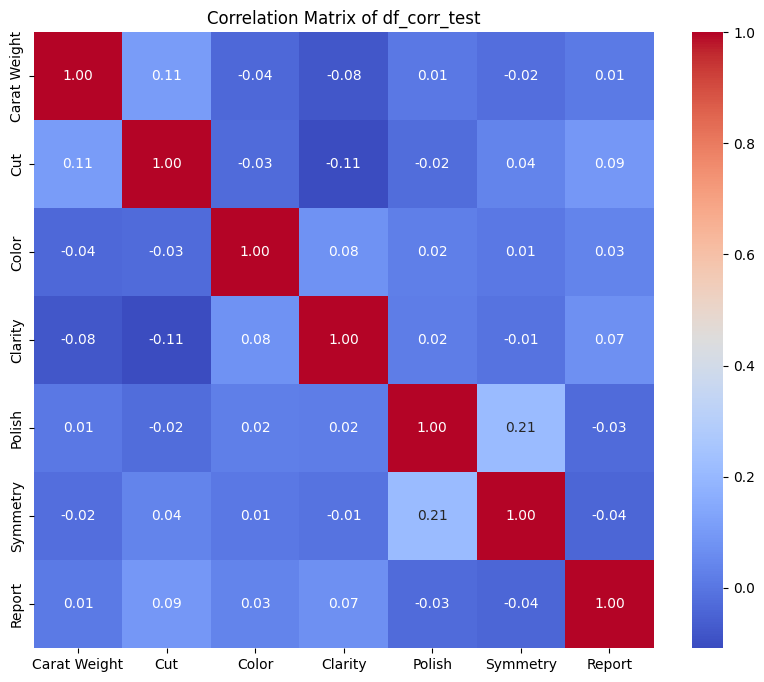

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [15]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 2870.26
Mean Squared Error (MSE): 24872126.03
R^2 Score: 0.77


In [16]:
resolve_regression(X[['Carat Weight', 'Clarity', 'Polish']], y)
None


Regularization: None
Mean Absolute Error (MAE): 2851.05
Mean Squared Error (MSE): 24814018.22
R^2 Score: 0.77


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [17]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,5,6,6,4,2,2
1,0.83,5,6,5,3,3,1
2,0.85,5,6,6,2,2,2
3,0.91,5,5,6,4,4,2
4,0.83,5,1,6,2,2,2
...,...,...,...,...,...,...,...
5995,1.03,5,3,6,2,2,2
5996,1.00,4,3,6,4,4,2
5997,1.02,5,3,6,2,2,2
5998,1.27,1,1,5,2,2,2


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   int64  
 2   Color         6000 non-null   int64  
 3   Clarity       6000 non-null   int64  
 4   Polish        6000 non-null   int64  
 5   Symmetry      6000 non-null   int64  
 6   Report        6000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 328.2 KB


Отбор признаков по корреляции

In [19]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [21]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [22]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 2855.87
Mean Squared Error (MSE): 24799526.70
R^2 Score: 0.77


In [23]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 2865.96
Mean Squared Error (MSE): 24846941.63
R^2 Score: 0.77


Regularization: None
Mean Absolute Error (MAE): 2865.96
Mean Squared Error (MSE): 24846941.63
R^2 Score: 0.77


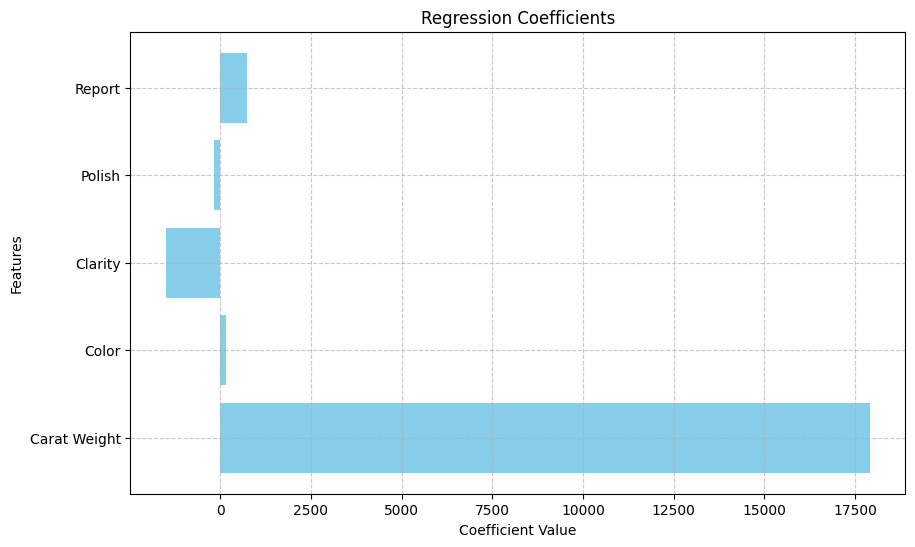

In [24]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [25]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-25-a7ff67a7c8f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [26]:
X_selected_rfe

,Carat Weight,Color,Clarity,Polish,Report
0,0.162037,6,6,4,2
1,0.037037,6,5,3,1
2,0.046296,6,6,2,2
3,0.074074,5,6,4,2
4,0.037037,1,6,2,2
...,...,...,...,...,...
5995,0.129630,3,6,2,2
5996,0.115741,3,6,4,2
5997,0.125000,3,6,2,2
5998,0.240741,1,5,2,2


Regularization: None
Mean Absolute Error (MAE): 2865.96
Mean Squared Error (MSE): 24846941.63
R^2 Score: 0.77


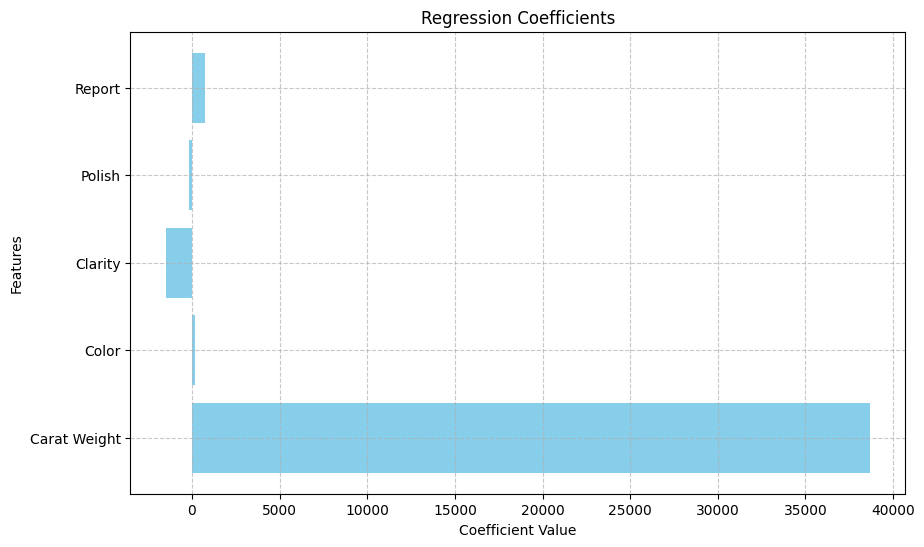

In [27]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [28]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 2865.96
Mean Squared Error (MSE): 24846941.63
R^2 Score: 0.77


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [29]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,5,6,6,4,2,2
1,0.83,5,6,5,3,3,1
2,0.85,5,6,6,2,2,2
3,0.91,5,5,6,4,4,2
4,0.83,5,1,6,2,2,2
...,...,...,...,...,...,...,...
5995,1.03,5,3,6,2,2,2
5996,1.00,4,3,6,4,4,2
5997,1.02,5,3,6,2,2,2
5998,1.27,1,1,5,2,2,2


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 2869.34
Mean Squared Error (MSE): 24870813.41
R^2 Score: 0.77


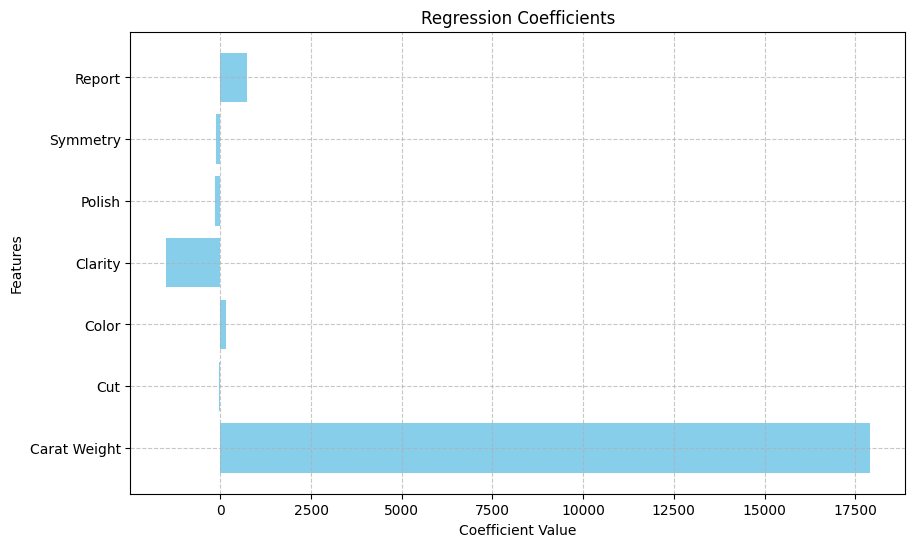

In [30]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 2868.89
Mean Squared Error (MSE): 24875724.33
R^2 Score: 0.77


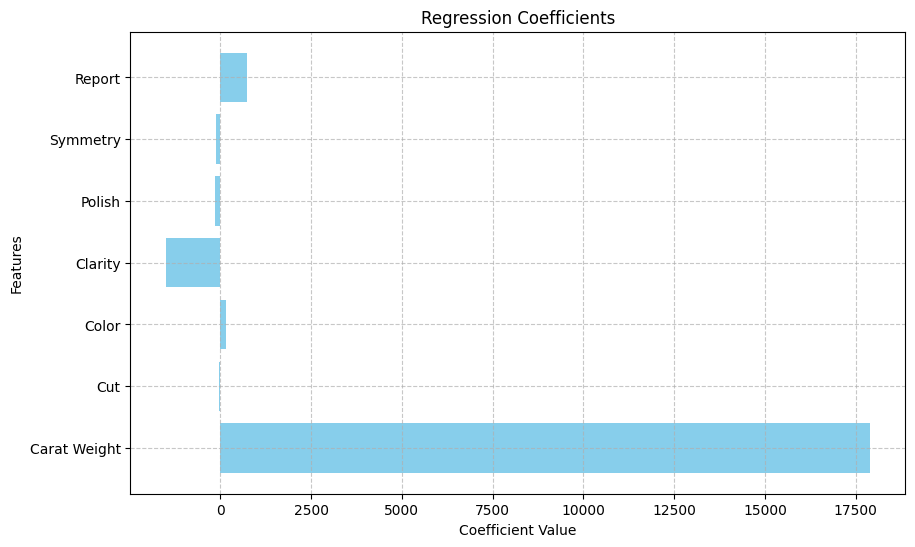

In [31]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 2870.26
Mean Squared Error (MSE): 24872126.03
R^2 Score: 0.77


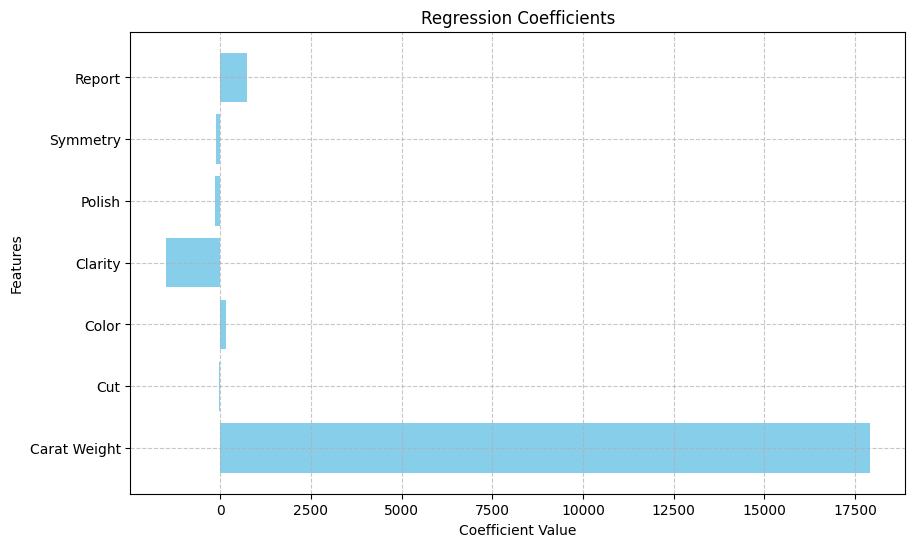

In [32]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
